In [2]:
import requests
import pandas as pd
#import json

In [26]:
from requests import request


endpoint_ulr="https://www.allkeyshop.com/api/price_history_api.php"

params={
    'normalised_name':18688,  #= RDR2, Heavy Rain = 15509, hitman 3 = 38888
    'currency':'EUR',
    'database':'allkeyshop.com',
    'v2':1
    }

headers={
}

r=request('get',endpoint_ulr, params=params, headers=headers)

df_history=pd.json_normalize(r.json(),record_path='history')

r.json()



{'officialMerchants': '620621,273,2231,2232,2234,12,68,69,690,666968,270,27000,444,165170,2,42002282,226,157,228,2280,81,5,501501,310,310273,701,700,7,704,700704,20,63,260260,125,1251,1254,1253,1252,1253125,250,252,253,254,255,270889441,3,333,230,231,232,233,234,235,1,502,504,505,506,50,503,504504,222,2222222,126,178,95,177,127,190,191,192,193,194,195,196,197,199,275,277,278,279,276,323,326,420,421,423,332,330',
 'history': [{'product_id': '134203749',
   'merchant_id': '321',
   'edition': '21',
   'min_discount_price': '32.34',
   'start': '2022-10-24 14:55:09',
   'end': '2022-10-27 00:51:43'},
  {'product_id': '134186032',
   'merchant_id': '321',
   'edition': '1',
   'min_discount_price': '22.33',
   'start': '2022-10-22 20:55:47',
   'end': '2022-10-27 00:51:40'},
  {'product_id': '134485322',
   'merchant_id': '272',
   'edition': '1',
   'min_discount_price': '22.28',
   'start': '2022-10-26 00:10:14',
   'end': '2022-10-27 00:10:53'},
  {'product_id': '134479618',
   'merchan

In [4]:
rj=r.json()['officialMerchants'].split(',')

rj=[int(i) for i in rj]

In [5]:
df_rj=pd.DataFrame(rj,columns=['officialMerchants'])
df_rj

,officialMerchants
0,620621
1,273
2,2231
3,12
4,68
...,...
66,323
67,326
68,421
69,332


In [6]:
df_history

,product_id,merchant_id,edition,min_discount_price,start,end
0,134203749,321,21,32.34,2022-10-24 14:55:09,2022-10-27 00:51:43
1,134186032,321,1,22.33,2022-10-22 20:55:47,2022-10-27 00:51:40
2,134485322,272,1,22.28,2022-10-26 00:10:14,2022-10-27 00:10:53
3,134479618,272,1,26.78,2022-10-26 00:42:51,2022-10-27 00:10:51
4,134474804,272,1,21.1,2022-10-26 05:15:21,2022-10-27 00:10:47
...,...,...,...,...,...,...
706,132846393,701,21,86.93,2022-10-24 16:39:12,2022-10-24 16:39:12
707,134060022,68,1,59.99,2022-10-24 10:29:12,2022-10-24 10:29:12
708,133199342,69,1,29.99,2022-10-21 10:59:20,2022-10-21 10:59:20
709,133337770,69,21,89.99,2022-10-20 10:04:17,2022-10-20 10:04:17


In [7]:
to_int=['edition', 'merchant_id', 'product_id']
df_history[to_int] = df_history[to_int].apply(lambda x: x.astype('int'))

df_history['min_discount_price'] = df_history['min_discount_price'].astype('float')

df_history['start']=pd.to_datetime(df_history['start'])
df_history['start']=pd.to_datetime(df_history['start'].dt.date)
#df_history['end']=pd.to_datetime(df_history['end'],format='%Y-%m-%d')

In [8]:
df_history['start']

0     2022-10-24
1     2022-10-22
2     2022-10-26
3     2022-10-26
4     2022-10-26
         ...    
706   2022-10-24
707   2022-10-24
708   2022-10-21
709   2022-10-20
710   2022-10-12
Name: start, Length: 711, dtype: datetime64[ns]

In [9]:
df_history.sort_values(by='start',inplace=True)
df_history

,product_id,merchant_id,edition,min_discount_price,start,end
563,132843846,61,1,26.47,2022-10-11,2022-10-12 00:09:22
557,134456010,321,1,40.50,2022-10-11,2022-10-12 00:53:29
558,134203749,321,21,50.40,2022-10-11,2022-10-12 00:53:04
559,133628377,224,1,22.71,2022-10-11,2022-10-12 00:10:08
560,134485322,272,1,21.91,2022-10-11,2022-10-12 00:09:47
...,...,...,...,...,...,...
595,132843846,61,1,26.34,2022-10-27,2022-10-27 07:47:11
594,134103656,61,1,29.70,2022-10-27,2022-10-27 07:47:15
592,133854267,224,21,28.44,2022-10-27,2022-10-27 07:47:29
590,133500378,61616,1,24.11,2022-10-27,2022-10-27 07:49:41


In [10]:
df_filt_off=df_history[df_history['merchant_id'].isin(rj)]
df_filt_off

,product_id,merchant_id,edition,min_discount_price,start,end
529,133560277,286,21,36.00,2022-10-11,2022-10-13 03:11:27
710,134402833,228,21,89.99,2022-10-12,2022-10-17 01:43:00
607,132883009,310,21,89.99,2022-10-12,2022-10-27 06:16:38
606,132848341,310,1,59.99,2022-10-12,2022-10-27 06:16:38
115,132846394,7,1,56.99,2022-10-13,2022-10-25 00:00:17
...,...,...,...,...,...,...
615,132852653,270,1,27.00,2022-10-26,2022-10-27 01:56:02
639,134507033,81,21,30.86,2022-10-26,2022-10-27 00:20:20
640,132846411,81,1,25.70,2022-10-26,2022-10-27 00:20:14
638,133364371,126,1,19.79,2022-10-27,2022-10-27 00:23:18


In [11]:
df_filt_key=df_history[~df_history['merchant_id'].isin(rj)]
df_filt_key['start']=df_filt_key['start'].dt.date
df_filt_key['start']=pd.to_datetime(df_filt_key['start'])
df_filt_key['start']

C:\Users\robbo\AppData\Local\Temp\ipykernel_12516\40808845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt_key['start']=df_filt_key['start'].dt.date
C:\Users\robbo\AppData\Local\Temp\ipykernel_12516\40808845.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filt_key['start']=pd.to_datetime(df_filt_key['start'])


563   2022-10-11
557   2022-10-11
558   2022-10-11
559   2022-10-11
560   2022-10-11
         ...    
595   2022-10-27
594   2022-10-27
592   2022-10-27
590   2022-10-27
603   2022-10-27
Name: start, Length: 647, dtype: datetime64[ns]

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

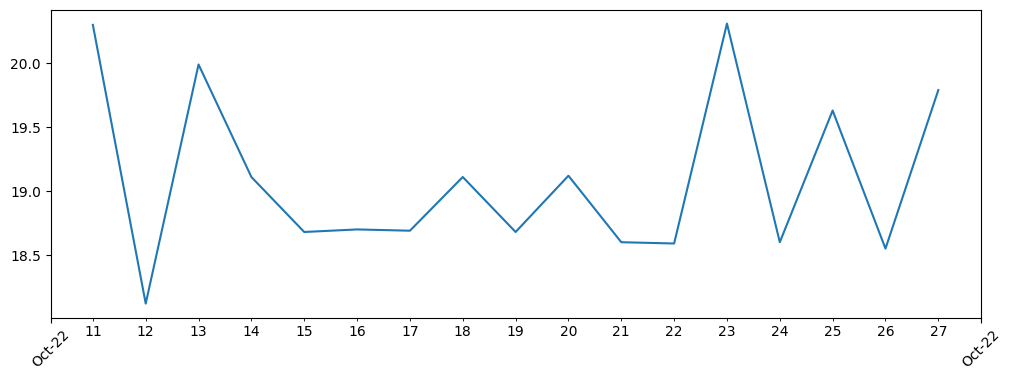

In [13]:

fig, axs = plt.subplots(figsize=(12,4))


#.value.plot(kind=bar, rot=0, ax=axs)

mm=df_history.groupby(df_history['start'].dt.date)['min_discount_price'].min()
#mm.plot(kind='bar', rot=0, ax=axs)
axs.plot(mm.index,mm.values)


axs.xaxis.set_major_locator(mdates.MonthLocator())
axs.xaxis.set_minor_locator(mdates.DayLocator())

axs.xaxis.set_minor_formatter(
    mdates.ConciseDateFormatter(axs.xaxis.get_minor_locator()))

#axs.xaxis.set_major_formatter(
#    mdates.ConciseDateFormatter(axs.xaxis.get_major_locator()))

axs.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
axs.xaxis.set_tick_params(rotation=45)

#or label in axs.get_xticklabels(which='major'):
#    label.set(rotation=30, horizontalalignment='right')

#axs.xaxis.set_major_formatter(xtick_formatter)



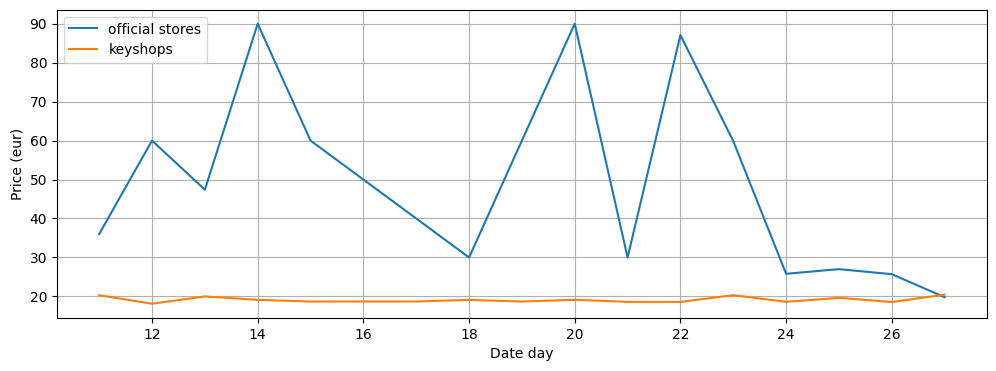

In [14]:

fig,ax=plt.subplots(figsize=(12,4))
#plt.style.use('_mpl-gallery')

df_plotto=df_filt_off.groupby(df_filt_off['start'].dt.day)['min_discount_price'].min()
#ax.plot(df_filt_off['start'].dt.day,df_filt_off['min_discount_price'].min(),linewidth=1.0)
ax=df_plotto.plot(kind='line',x='start',y='min_discount_price', label="official stores")

df_plotto_key=df_filt_key.groupby(df_filt_key['start'].dt.day)['min_discount_price'].min()
df_plotto_key.plot(ax=ax,kind='line',x='start',y='min_discount_price', label="keyshops")
plt.legend(loc='upper left')
ax.set_xlabel('Date day')
ax.set_ylabel('Price (eur)')

ax.grid(True)


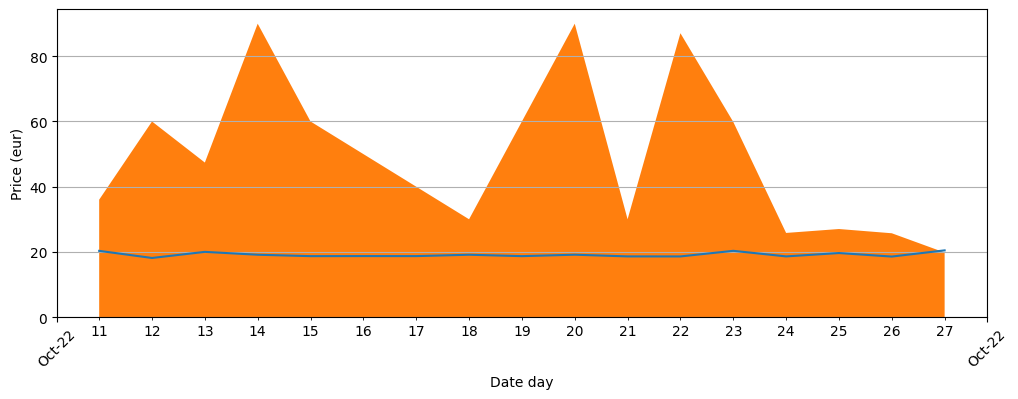

In [15]:

fig,ax=plt.subplots(figsize=(12,4))
#plt.style.use('_mpl-gallery')

df_plotto2=df_filt_key.groupby(df_filt_key['start'].dt.date)['min_discount_price'].min()
#ax.plot(df_filt_off['start'].dt.day,df_filt_off['min_discount_price'].min(),linewidth=1.0)
plt.plot(df_plotto2.index,df_plotto2.values)

series_off=df_filt_off.groupby(df_filt_off['start'].dt.date)['min_discount_price'].min()
plt.stackplot(series_off.index,series_off.values)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())

ax.xaxis.set_minor_formatter(
    mdates.ConciseDateFormatter(axs.xaxis.get_minor_locator()))

#axs.xaxis.set_major_formatter(
#    mdates.ConciseDateFormatter(axs.xaxis.get_major_locator()))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
ax.xaxis.set_tick_params(rotation=45)

#plt.legend(loc='upper left')
ax.set_xlabel('Date day')
ax.set_ylabel('Price (eur)')

ax.grid(True)

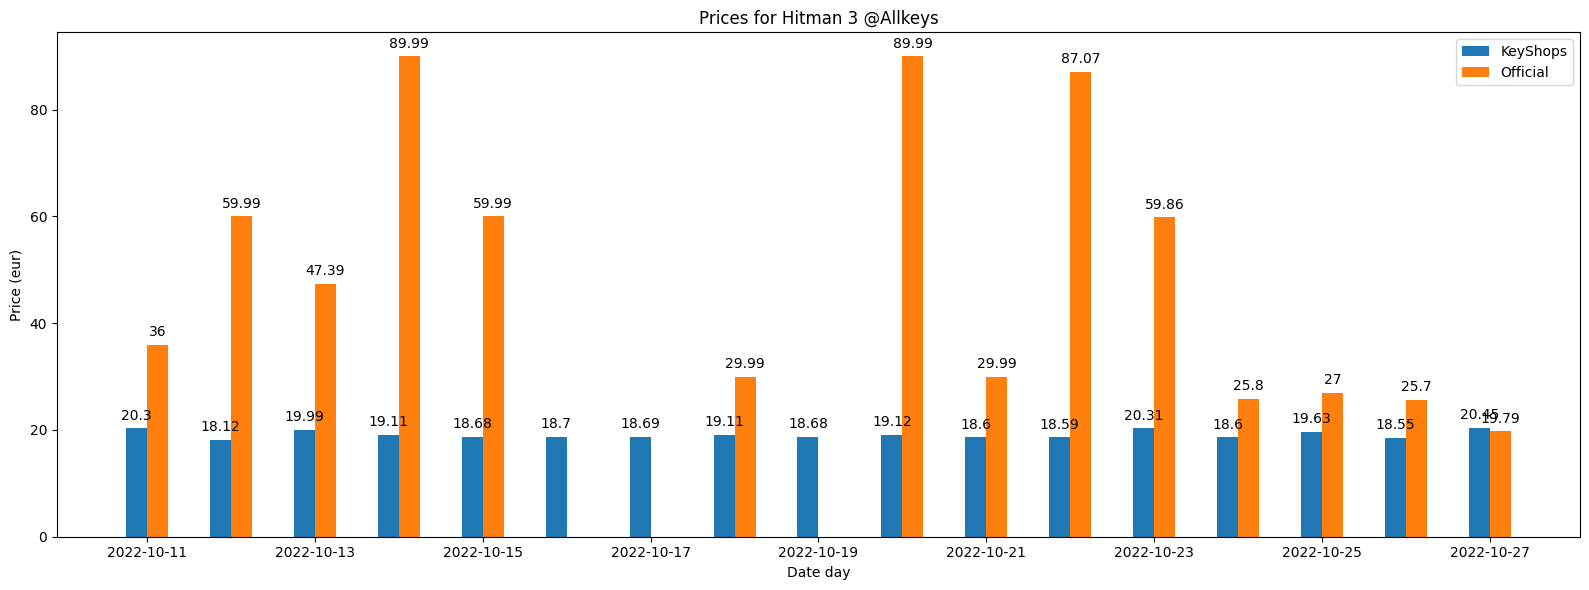

In [16]:
fig,ax=plt.subplots(figsize=(16,6))

width=0.25

df_plotto2=df_filt_key.groupby(df_filt_key['start'].dt.date)['min_discount_price'].min()
rects1 = ax.bar(df_plotto2.index,df_plotto2.values, -width,label='KeyShops',align='edge')

series_off=df_filt_off.groupby(df_filt_off['start'].dt.date)['min_discount_price'].min()
rects2 = ax.bar(series_off.index,series_off.values, width,label='Official',align='edge')

ax.set_title('Prices for Hitman 3 @Allkeys')

plt.legend(loc='upper right')
ax.set_xlabel('Date day')
ax.set_ylabel('Price (eur)')

ax.bar_label(rects1, padding=4)
ax.bar_label(rects2, padding=4)

fig.tight_layout()



In [25]:
df_filt_key['min_discount_price'].corr(df_filt_key['edition'])

0.21794265243276853

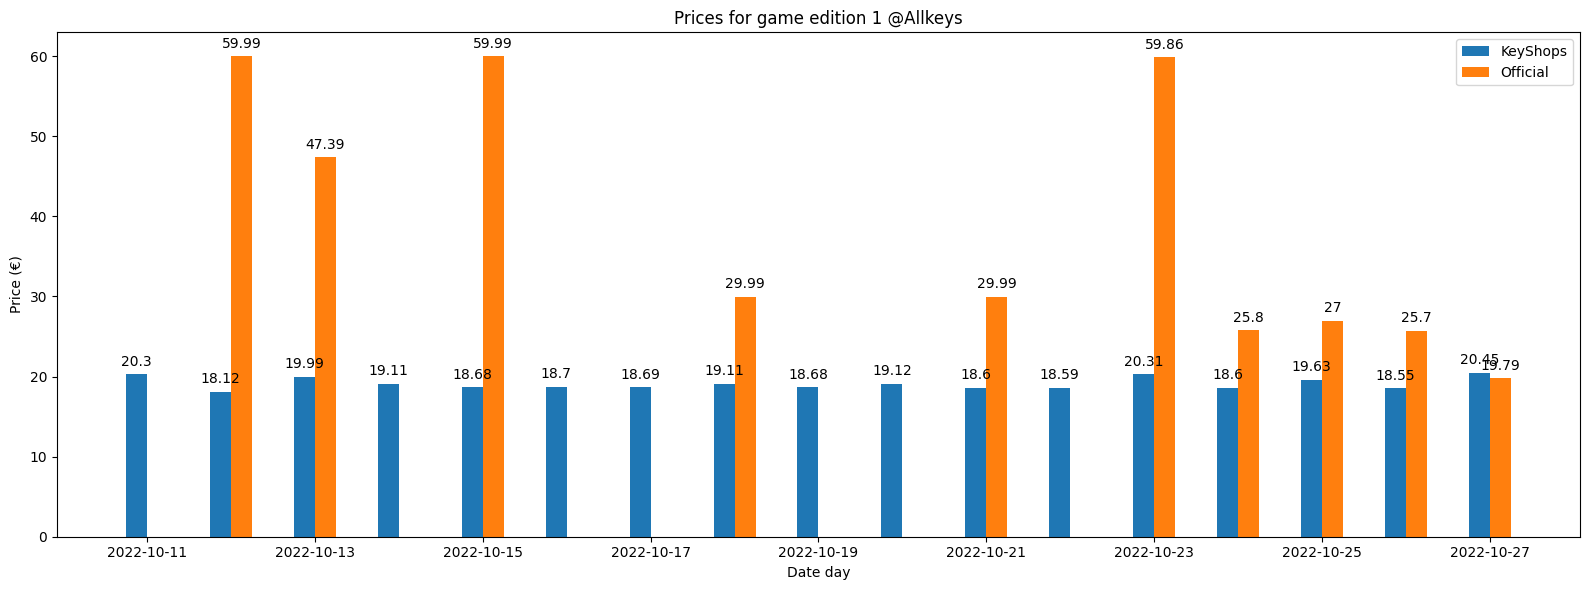

In [35]:
fig,ax=plt.subplots(figsize=(16,6))

width=0.25

df_plotto2=df_filt_key.groupby(df_filt_key['start'].dt.date)['min_discount_price'].min()
rects1 = ax.bar(df_plotto2.index,df_plotto2.values, -width,label='KeyShops',align='edge')

series_off=df_filt_off.groupby(df_filt_off['start'].dt.date)['min_discount_price'].min()
rects2 = ax.bar(series_off.index,series_off.values, width,label='Official',align='edge')

ax.set_title('Prices for game edition 1 @Allkeys')

plt.legend(loc='upper right')
ax.set_xlabel('Date day')
ax.set_ylabel('Price (€)')

ax.bar_label(rects1, padding=4)
ax.bar_label(rects2, padding=4)

fig.tight_layout()

In [95]:
df_filt_off['edition'].unique()

array([21,  1])

In [75]:
df_filt_key.groupby('edition')['edition'].nunique()

pandas.core.series.Series

In [101]:
subplot_list_off=[]
subplot_list_key=[]

In [102]:
for ed in df_filt_off['edition'].unique():
    subplot_list_off.append(df_filt_off[df_filt_off['edition']==ed])

for ed in df_filt_key['edition'].unique():
    subplot_list_key.append(df_filt_key[df_filt_key['edition']==ed])



subplot_list_off.append(df_filt_off[df_filt_off['edition']==1])
subplot_list_off.append(df_filt_off[df_filt_off['edition']==21])

subplot_list_key.append(df_filt_key[df_filt_key['edition']==1])
subplot_list_key.append(df_filt_key[df_filt_key['edition']==21])
subplot_list_key.append(df_filt_key[df_filt_key['edition']==41])


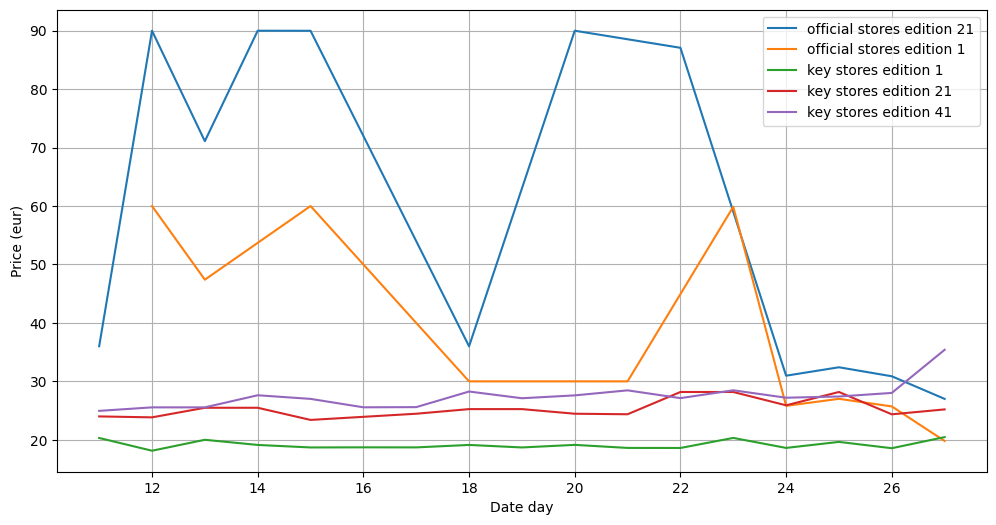

In [104]:

fig,ax=plt.subplots(figsize=(12,6))
#plt.style.use('_mpl-gallery')


for sp in subplot_list_off:
    df_plotto=sp.groupby(sp['start'].dt.day)['min_discount_price'].min()
    ax=df_plotto.plot(kind='line',x='start',y='min_discount_price', label=f"official stores edition {sp['edition'].iloc[0]}")

for sp in subplot_list_key:
    df_plotto=sp.groupby(sp['start'].dt.day)['min_discount_price'].min()
    ax=df_plotto.plot(kind='line',x='start',y='min_discount_price', label=f"key stores edition {sp['edition'].iloc[0]}")


plt.legend(loc='upper right')
ax.set_xlabel('Date day')
ax.set_ylabel('Price (eur)')

ax.grid(True)